<a href="https://colab.research.google.com/github/WittmannF/sort-google-scholar/blob/no_code_nb/examples/Sort_Google_Scholar_No_Code_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sort Google Scholar - No Code Version


## 1. Type or Paste your search query bellow (including special Google Scholar rules like AND/OR or 'exact keyword')
For more keyword details, please refer to [this reference](https://guides.library.ucsc.edu/c.php?g=745384&p=5361954).



In [ ]:
search_query = "large language models" # @param {type:"string"}


Some examples:

- `Large Language Models` → General search
- `"Large Language Models"` → Exact phrase search
- `Large Language Models -transformer` → Exclude specific term
- `Large Language Models author:"Geoffrey Hinton"` → Search by author
- `Large Language Models source:Nature` → Search within a specific publication
- `("Large Language Models" OR "Transformer Models") AND (GPT OR BERT)` → Boolean search
- `intitle:"Large Language Models"` → Search in the title only


### Optional Parameters

In [ ]:
# Expanded form with extra parameters
sortby = "cit/year"  # @param ["Citations", "cit/year"] {type:"string"}
nresults = 100  # @param {type:"number"}
startyear = None  # @param {type:"string"}
endyear = None  # @param {type:"string"}

# Constructing the base command
cmd = f"sortgs '{search_query}' --sortby '{sortby}' --nresults {nresults}"

if startyear:
    cmd += f" --startyear {startyear}"

if endyear:
    cmd += f" --endyear {endyear}"




# 2. Next, click in Runtime > Run All

In [ ]:
# @title
!pip install sortgs --quiet

In [ ]:
# @title
!{cmd}

Running with the following parameters:
Keyword: large language models, Number of results: 100, Save database: True, Path: /content, Sort by: cit/year, Plot results: False, Start year: None, End year: 2024, Debug: False
Loading next 10 results
Loading next 20 results
Loading next 30 results
Loading next 40 results
Loading next 50 results
Loading next 60 results
Loading next 70 results
Loading next 80 results
Loading next 90 results
Loading next 100 results
                                             Author  ... cit/year
Rank                                                 ...         
57                       Wei, X Wang, D Schuurmans…  ...     2406
80                     Hu, Y Shen, P Wallis, Z Alle  ...     1652
1        Kasneci, K Seßler, S Küchemann, M Bannert…  ...     1390
78                    Yao, D Yu, J Zhao, I Shafran…  ...     1304
3              Chang, X Wang, J Wang, Y Wu, L Yang…  ...     1198
...                                             ...  ...      ...
84          

> _**NOTE:** It is normal to get some warnings, for example year not found or author not found. However, if you get the robot checking warning, then it might not work anymore in the IP that you have on Google Colab. You can try going in 'Runtime' > 'Disconnect and delete runtime' to get a new IP. If the problem persists, then you will have to run locally using selenium and solve the captchas manually. Make sure to avoid running this code too often to avoid the robot checking problem._

# 3. Download the results


To download the `.csv` file, click the **folder icon** on the left to open the **Files** panel, locate the file with the same name as your search keyword, click the **three dots** next to the file, and select **Download** from the options menu.

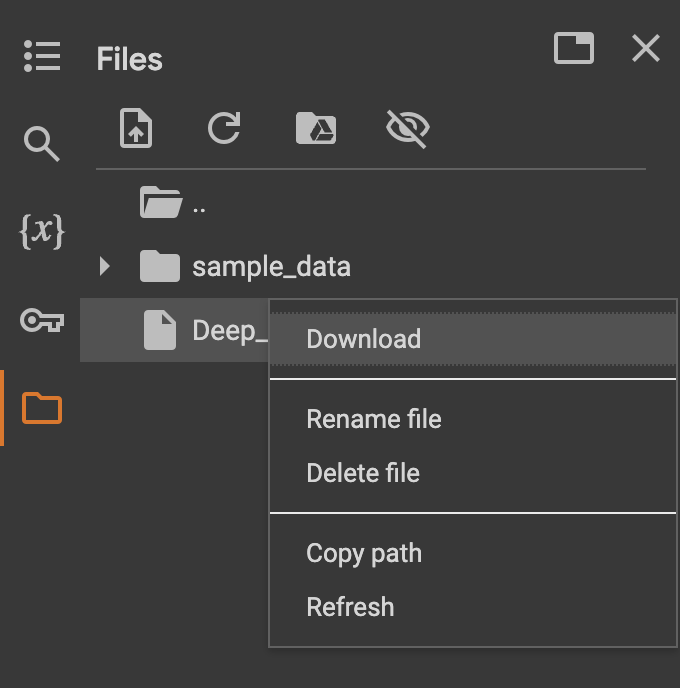



You can also visualize the top results here:

In [ ]:
# @title
import pandas as pd
results = pd.read_csv(search_query.replace(' ', '_')+'.csv')
results

,Rank,Author,Title,Citations,Year,Publisher,Venue,Source,cit/year
0,57,"Wei, X Wang, D Schuurmans…",Chain-of-thought prompting elicits reasoning i...,7219,2022,proceedings.neurips.cc,Advances in neural …,https://proceedings.neurips.cc/paper_files/pap...,2406
1,80,"Hu, Y Shen, P Wallis, Z Alle",Lora: Low-rank adaptation of large language mo...,6608,2021,arxiv.org,arXiv preprint arXiv …,https://arxiv.org/abs/2106.09685,1652
2,1,"Kasneci, K Seßler, S Küchemann, M Bannert…",ChatGPT for good? On opportunities and challen...,2779,2023,Elsevier,Learning and individual …,https://www.sciencedirect.com/science/article/...,1390
3,78,"Yao, D Yu, J Zhao, I Shafran…",Tree of thoughts: Deliberate problem solving w...,1304,2024,proceedings.neurips.cc,Advances in …,https://proceedings.neurips.cc/paper_files/pap...,1304
4,3,"Chang, X Wang, J Wang, Y Wu, L Yang…",A survey on evaluation of large language models,1198,2024,dl.acm.org,ACM Transactions on …,https://dl.acm.org/doi/abs/10.1145/3641289,1198
...,...,...,...,...,...,...,...,...,...
95,84,"Maatouk, N Piovesan, F Ayed…",Large language models for telecom: Forthcoming...,29,2024,ieeexplore.ieee.org,IEEE …,https://ieeexplore.ieee.org/abstract/document/...,29
96,45,"Li, L Xia, J Tang, Y Xu, L Shi, L Xia, D Yin…",Urbangpt: Spatio-temporal large language models,23,2024,dl.acm.org,Proceedings of the 30th …,https://dl.acm.org/doi/abs/10.1145/3637528.367...,23
97,82,"Cheng, S Huang, F Wei",Adapting large language models via reading com...,44,2023,openreview.net,The Twelfth International Conference on …,https://openreview.net/forum?id=y886UXPEZ0,22
98,50,"Zhu, Q Zhao, H Chen, J Wang, X Xie",Promptbench: A unified library for evaluation ...,14,2024,jmlr.org,Journal of Machine Learning …,https://www.jmlr.org/papers/v25/24-0023.html,14


In [ ]:
# @title Rank vs Citations

import plotly.express as px
view = results.reset_index().copy()

# Function to truncate and add line breaks to long titles
def shorten_title(title, max_length=60):
    words = title.split()
    shortened_lines = []
    current_line = []

    # Add words to the current line until max_length is exceeded
    for word in words:
        if len(' '.join(current_line + [word])) <= max_length:
            current_line.append(word)
        else:
            shortened_lines.append(' '.join(current_line))
            current_line = [word]

    # Add the last line
    if current_line:
        shortened_lines.append(' '.join(current_line))

    return '<br>'.join(shortened_lines)


# Apply this function to the 'Title' column and create a new column for the shortened titles
view['Short_Title'] = view['Title'].apply(shorten_title)

# Now use 'Short_Title' for hover_name
fig = px.scatter(view,
                 x='Rank',
                 y='Citations',
                 title='Number of Citations vs Google Scholar Rank',
                 hover_name='Short_Title',
                 hover_data=['Rank', 'Author', 'Citations', 'Year', 'Publisher', 'Venue', 'cit/year']
)
fig.show()

In [ ]:
# @title
# Now use 'Short_Title' for hover_name
fig = px.scatter(view,
                 x='Rank',
                 y='cit/year',
                 title='Number of Citations/Year vs Google Scholar Rank',
                 hover_name='Short_Title',
                 hover_data=['Rank', 'Author', 'Citations', 'Year', 'Publisher', 'Venue', 'cit/year']
)
fig.show()